         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

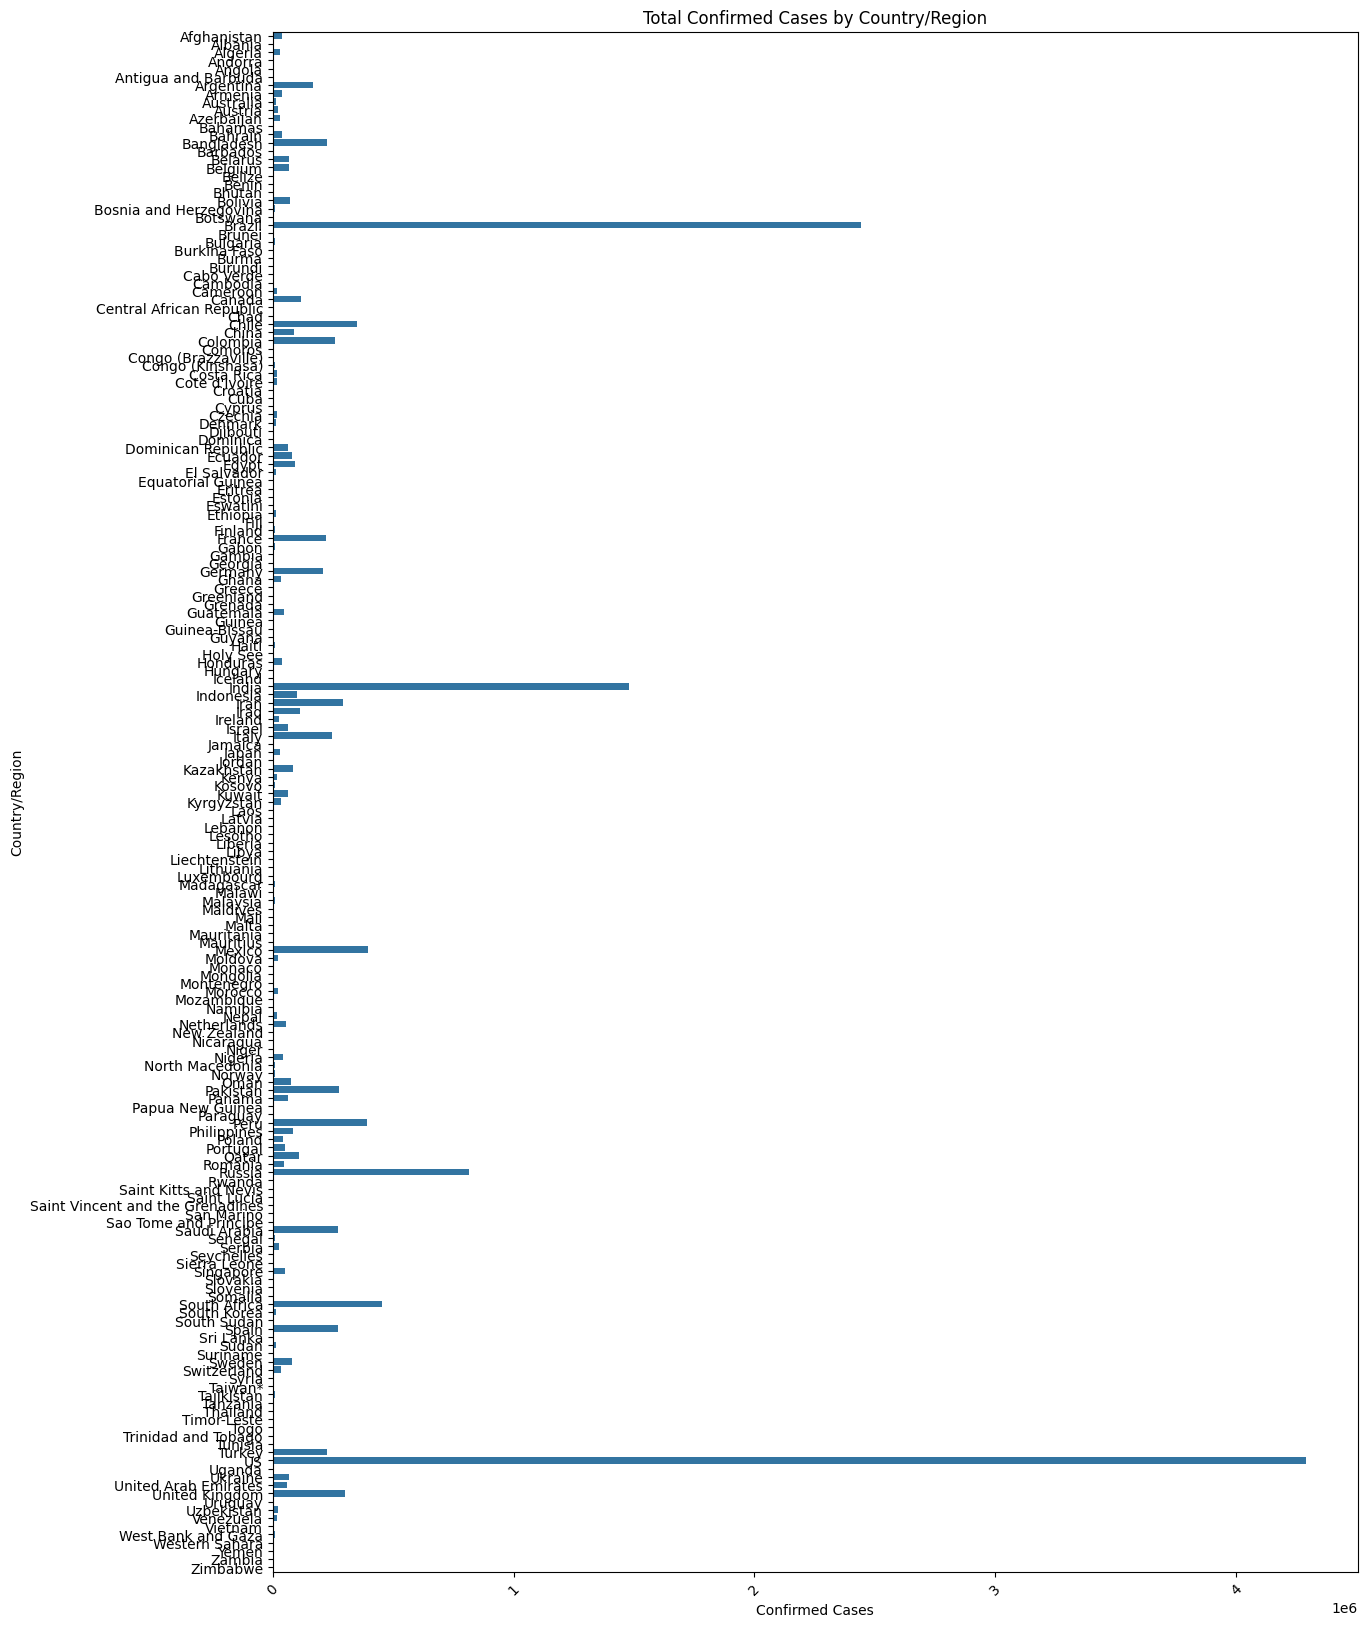

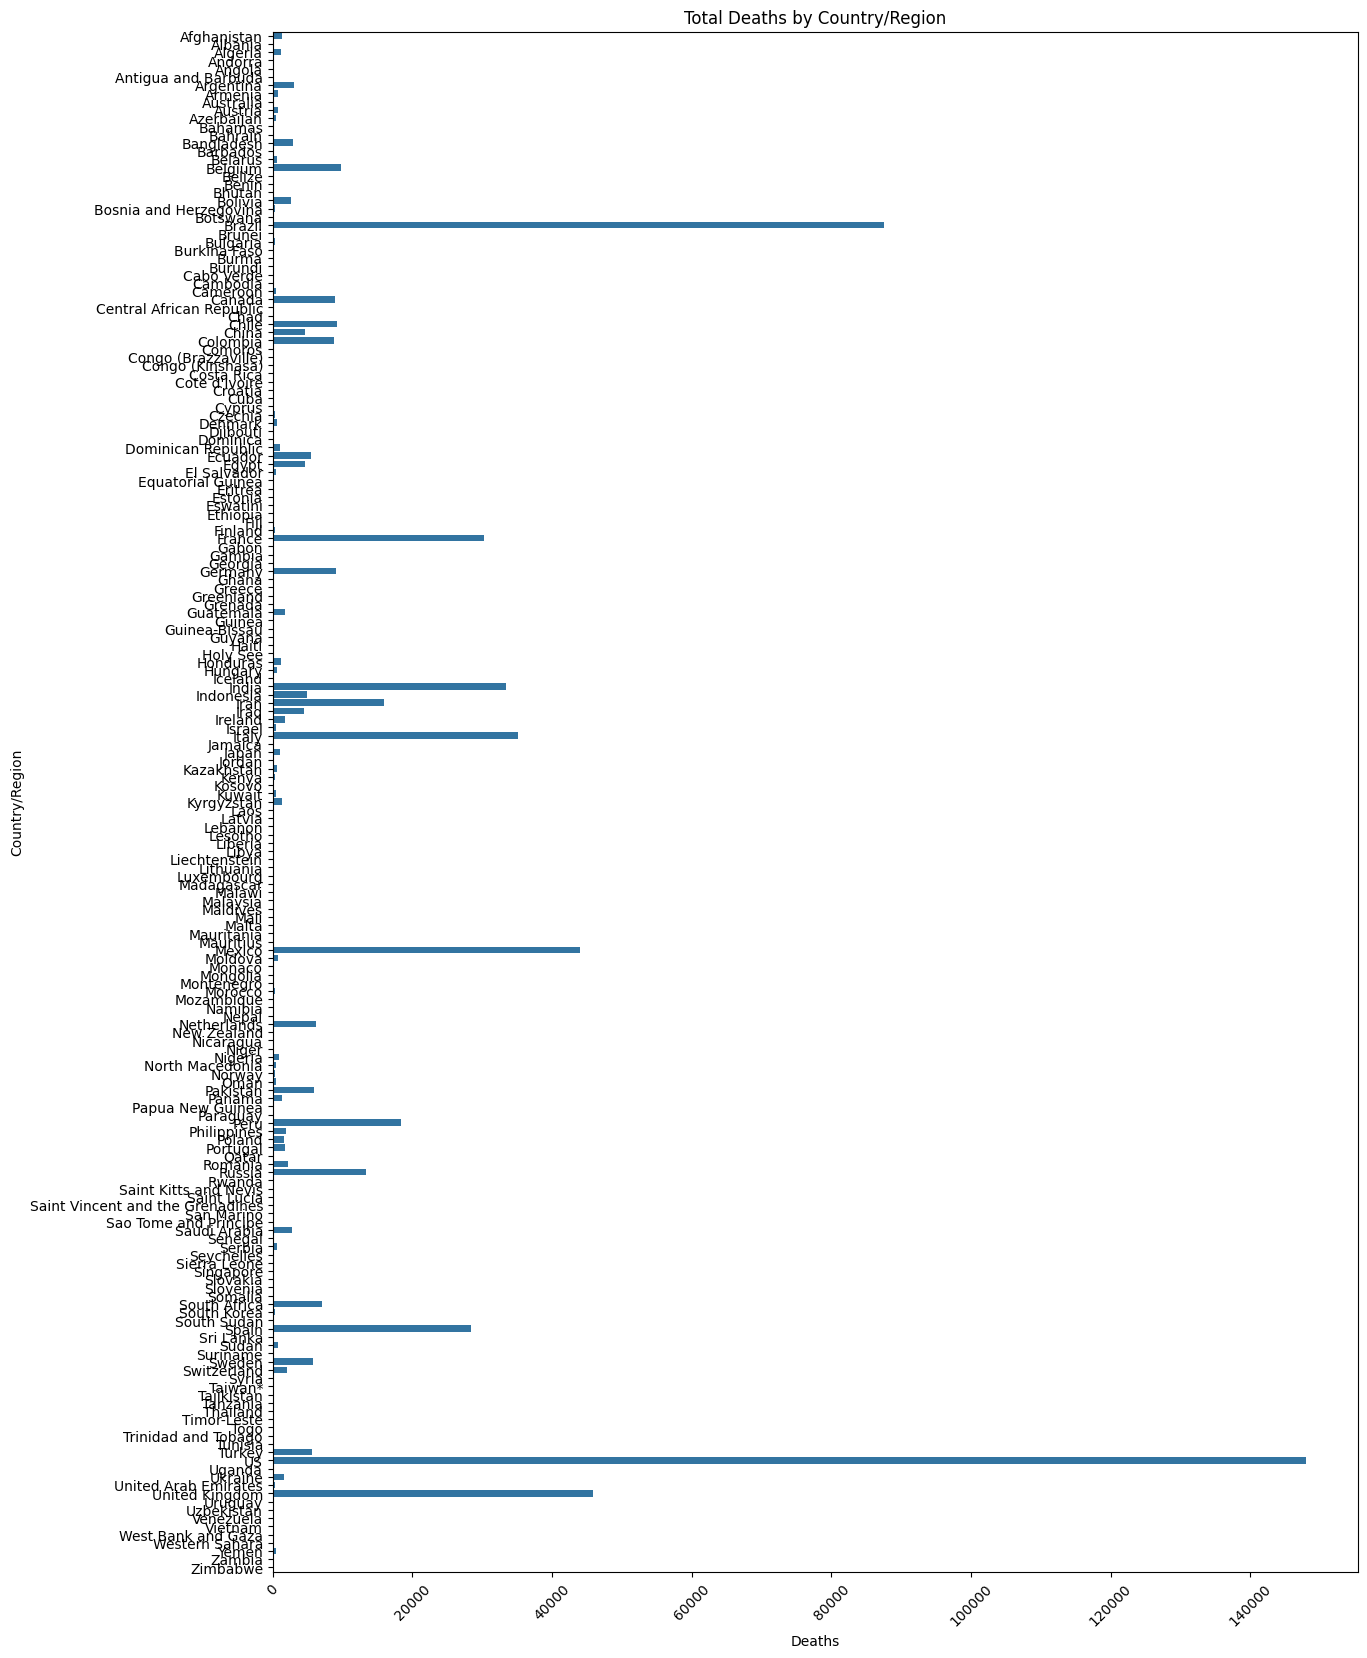

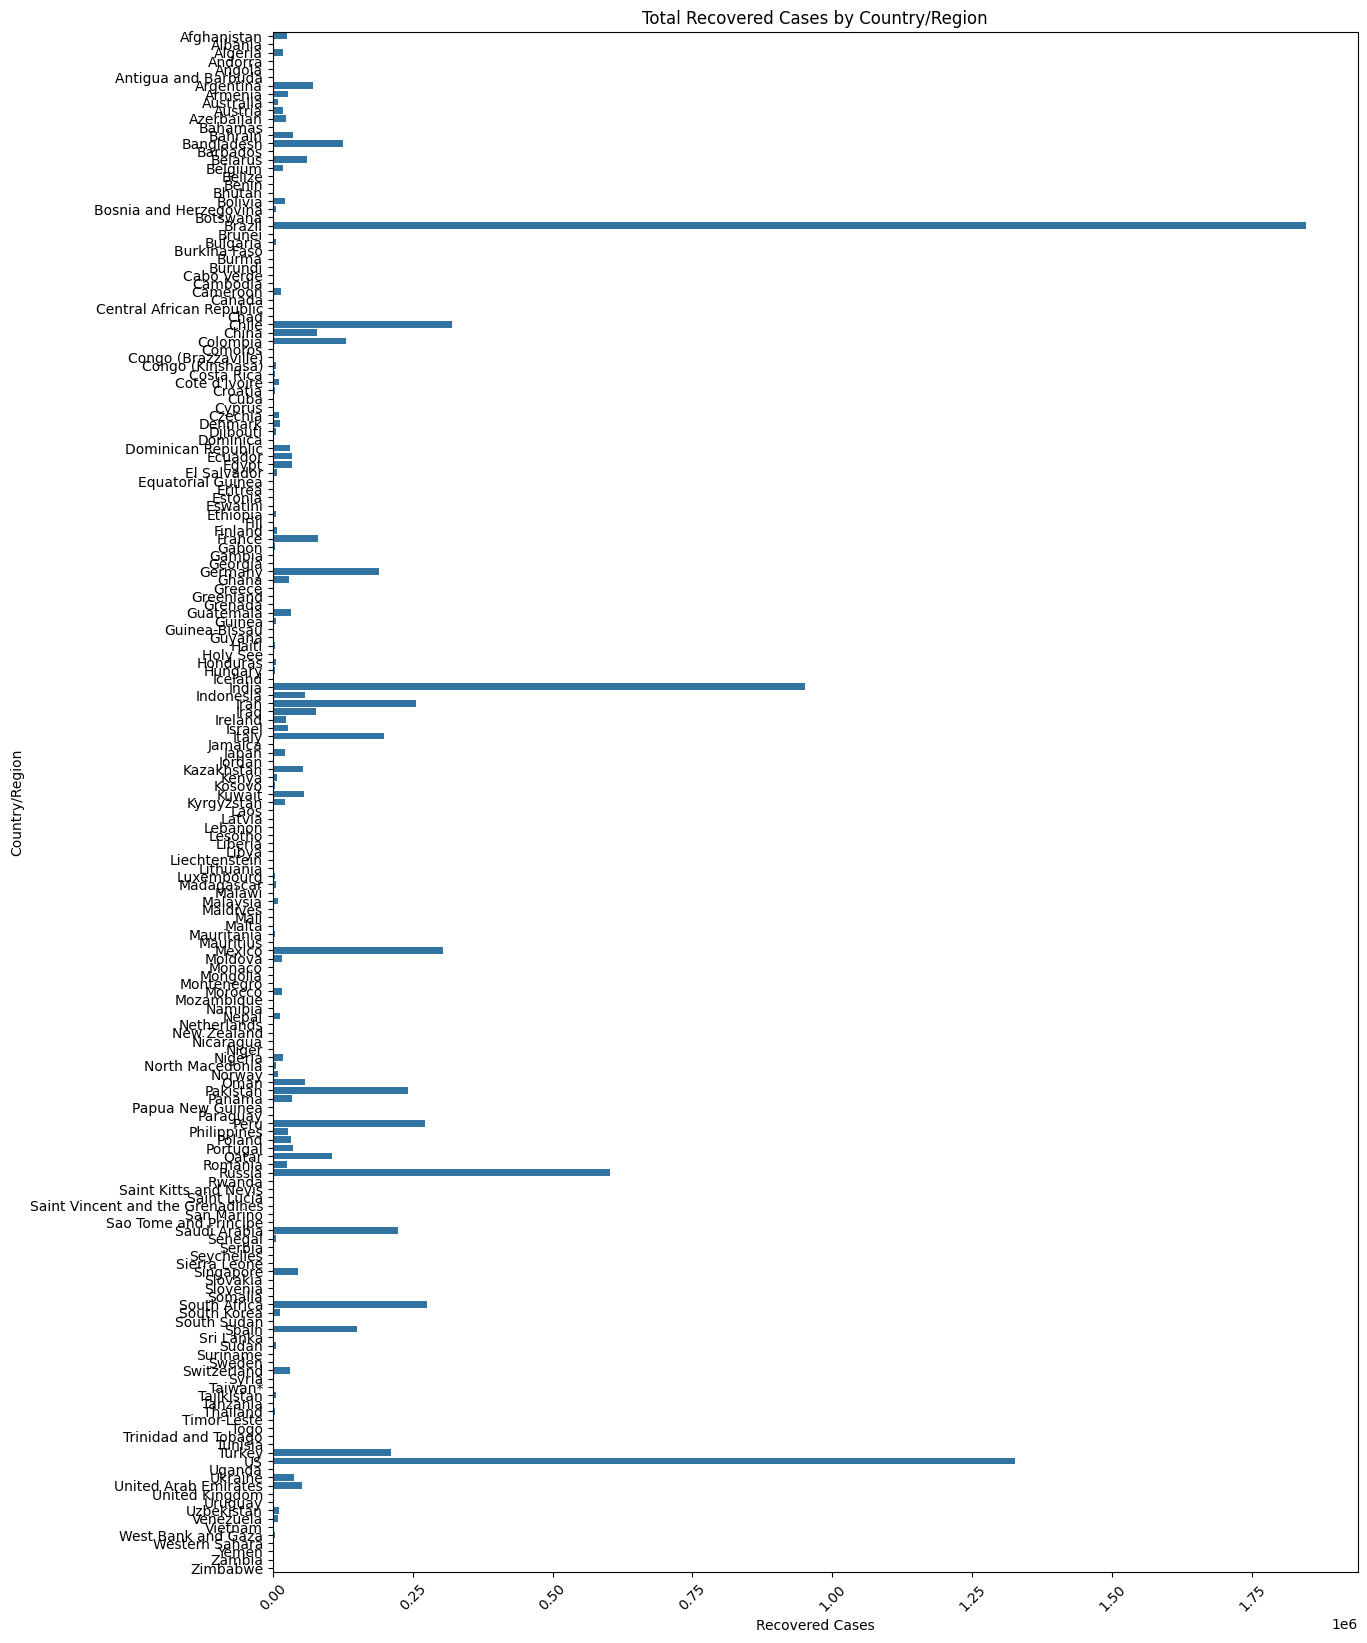

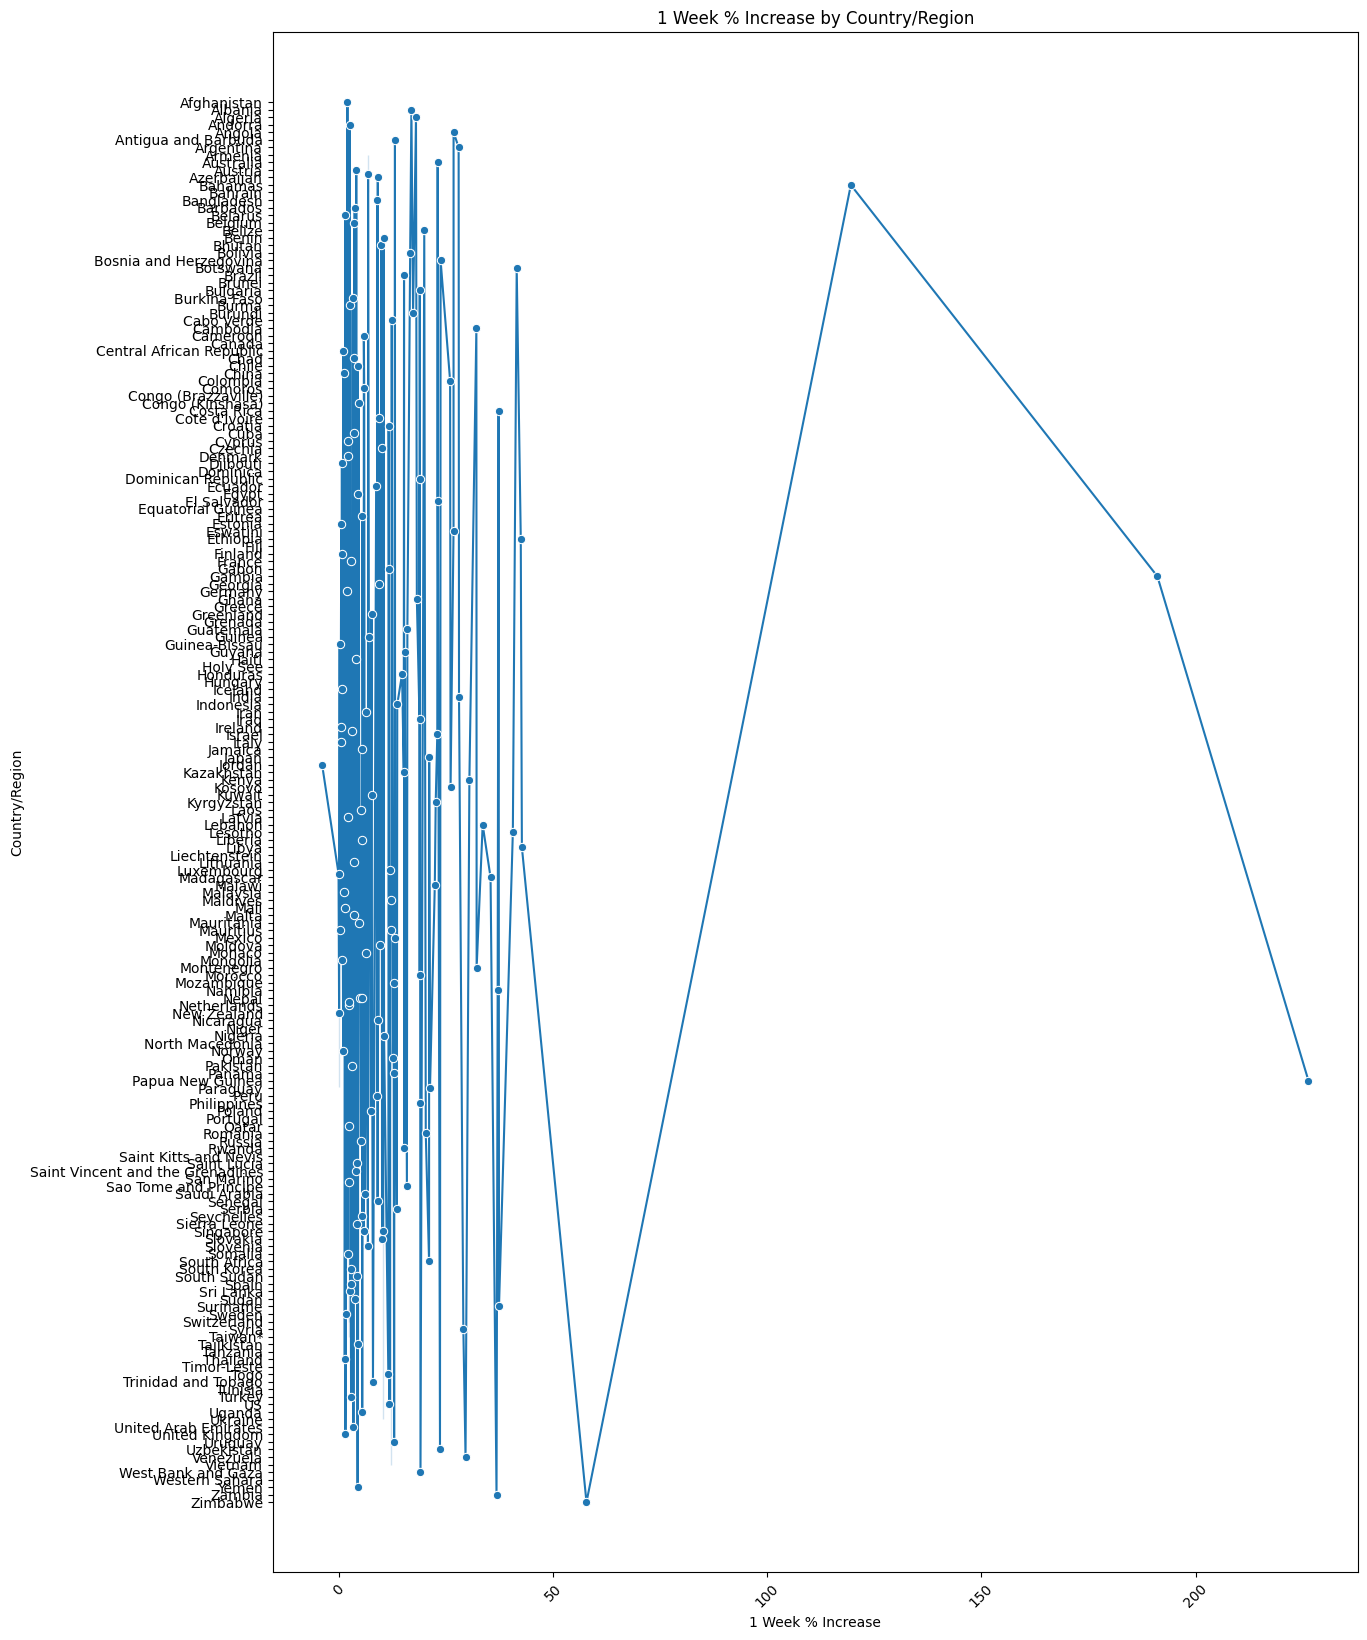

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the CSV file
file_path = "C:/Users/bhavy/Desktop/Covid-19 Dataset.csv"  # Replace with your actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)

# Visualizations
plt.figure(figsize=(14, 20))  # Increase figure height for better spacing
sns.barplot(y="Country/Region", x="Confirmed", data=df)
plt.title("Total Confirmed Cases by Country/Region")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country/Region")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(14, 20))  # Increase figure height for better spacing
sns.barplot(y="Country/Region", x="Deaths", data=df)
plt.title("Total Deaths by Country/Region")
plt.xlabel("Deaths")
plt.ylabel("Country/Region")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(14, 20))  # Increase figure height for better spacing
sns.barplot(y="Country/Region", x="Recovered", data=df)
plt.title("Total Recovered Cases by Country/Region")
plt.xlabel("Recovered Cases")
plt.ylabel("Country/Region")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

plt.figure(figsize=(14, 20))  # Increase figure height for better spacing
sns.lineplot(y="Country/Region", x="1 week % increase", data=df, marker='o')
plt.title("1 Week % Increase by Country/Region")
plt.xlabel("1 Week % Increase")
plt.ylabel("Country/Region")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [25]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/bhavy/Desktop/Covid-19 Dataset.csv"
covid_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
covid_data.head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
import numpy as np

# Define the state space (features we'll consider)
states = covid_data[['Active', 'New cases', 'Deaths / 100 Cases', 'Recovered / 100 Cases']].values

# Define the action space (0: No action, 1: Quarantine, 2: Increase Testing, 3: Public Awareness)
actions = [0, 1, 2, 3]
n_actions = len(actions)

# Initialize Q-table with zeros
q_table = np.zeros((states.shape[0], n_actions))

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation trade-off

# Function to choose an action using epsilon-greedy policy
def choose_action(state_index):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state_index])  # Exploit

# Function to update the Q-value
def update_q_value(state_index, action_index, reward, next_state_index):
    best_next_action = np.argmax(q_table[next_state_index])
    q_table[state_index, action_index] += alpha * (reward + gamma * q_table[next_state_index, best_next_action] - q_table[state_index, action_index])

# Simulate the Q-learning process
for episode in range(100):  # Number of episodes for training
    for state_index in range(states.shape[0]):
        action = choose_action(state_index)
        # Assume the reward is inversely proportional to new cases and deaths
        reward = -(covid_data['New cases'].iloc[state_index] + covid_data['Deaths / 100 Cases'].iloc[state_index])
        
        # Take the action and move to the next state
        next_state_index = (state_index + 1) % states.shape[0]
        
        # Update Q-value
        update_q_value(state_index, action, reward, next_state_index)

# Display the Q-table
q_table


array([[-4.35092738e+02, -4.33187888e+02, -4.41956087e+02,
        -4.48086945e+02],
       [-6.12089556e+02, -6.31375697e+02, -6.19507010e+02,
        -6.23644860e+02],
       [-8.96827072e+02, -9.06211804e+02, -9.00551259e+02,
        -9.21505818e+02],
       [-9.73081316e+02, -8.81987371e+02, -7.93550722e+02,
        -8.54911335e+02],
       [-1.85674117e+03, -1.89457113e+03, -1.89686452e+03,
        -1.91566533e+03],
       [-3.32141979e+03, -3.28626008e+03, -3.31620607e+03,
        -3.33286352e+03],
       [-4.77095902e+03, -4.76778370e+03, -4.77369802e+03,
        -4.77681464e+03],
       [-4.33998713e+02, -4.29684832e+02, -4.35291783e+02,
        -4.41659411e+02],
       [-6.27177677e+02, -6.29860441e+02, -6.30144588e+02,
        -6.39781316e+02],
       [-5.93802058e+02, -5.84548078e+02, -5.84143845e+02,
        -6.08520924e+02],
       [-9.81831627e+02, -9.91449041e+02, -1.00216155e+03,
        -1.02258521e+03],
       [-1.29383610e+03, -1.33116527e+03, -1.30761257e+03,
      

In [4]:
# Determine the optimal policy by selecting the action with the highest Q-value for each state
optimal_policy = np.argmax(q_table, axis=1)

# Map the action indices back to their respective action descriptions
action_mapping = {0: 'No action', 1: 'Quarantine', 2: 'Increase Testing', 3: 'Public Awareness'}
optimal_policy_actions = [action_mapping[action] for action in optimal_policy]

# Combine states with their corresponding optimal actions
optimal_policy_df = pd.DataFrame(states, columns=['Active', 'New cases', 'Deaths / 100 Cases', 'Recovered / 100 Cases'])
optimal_policy_df['Optimal Action'] = optimal_policy_actions

# Display the first few rows of the policy
optimal_policy_df.head()


,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Optimal Action
0,9796.0,106.0,3.50,69.49,Quarantine
1,1991.0,117.0,2.95,56.25,No action
2,7973.0,616.0,4.16,67.34,No action
3,52.0,10.0,5.73,88.53,Increase Testing
4,667.0,18.0,4.32,25.47,No action


In [27]:
import pandas as pd

optimal_policy_df['Country/Region'] = covid_data['Country/Region'].values

# Reordering the columns to place 'Country/Region' at the beginning
optimal_policy_df = optimal_policy_df[['Country/Region', 'Active', 'New cases', 'Deaths / 100 Cases', 
                                       'Recovered / 100 Cases', 'Optimal Action']]


optimal_policy_df.head(30)  # Display the first 20 entries of the final table


,Country/Region,Active,New cases,Deaths / 100 Cases,Recovered / 100 Cases,Optimal Action
0,Afghanistan,9796.0,106.0,3.50,69.49,Quarantine
1,Albania,1991.0,117.0,2.95,56.25,No action
2,Algeria,7973.0,616.0,4.16,67.34,No action
3,Andorra,52.0,10.0,5.73,88.53,Increase Testing
4,Angola,667.0,18.0,4.32,25.47,No action
5,Antigua and Barbuda,18.0,4.0,3.49,75.58,Quarantine
6,Argentina,91782.0,4890.0,1.83,43.35,Quarantine
7,Armenia,10014.0,73.0,1.90,71.32,Quarantine
8,Australia,5825.0,368.0,1.09,60.84,No action
9,Austria,1599.0,86.0,3.47,88.75,Increase Testing


In [15]:
import numpy as np

# Define the state space (features we'll consider)
states = covid_data[['Active', 'New cases', 'Deaths / 100 Cases', 'Recovered / 100 Cases']].values

# Define the action space (0: No action, 1: Quarantine, 2: Increase Testing, 3: Public Awareness)
actions = [0, 1, 2, 3]
n_actions = len(actions)

# Initialize Q-table with zeros
q_table = np.zeros((states.shape[0], n_actions))

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration-exploitation trade-off

# Function to choose an action using epsilon-greedy policy
def choose_action(state_index):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state_index])  # Exploit

# Function to update the Q-value
def update_q_value(state_index, action_index, reward, next_state_index):
    best_next_action = np.argmax(q_table[next_state_index])
    q_table[state_index, action_index] += alpha * (reward + gamma * q_table[next_state_index, best_next_action] - q_table[state_index, action_index])

# Simulate the Q-learning process
for episode in range(100):  # Number of episodes for training
    for state_index in range(states.shape[0]):
        action = choose_action(state_index)
        # Assume the reward is inversely proportional to new cases and deaths
        reward = -(covid_data['New cases'].iloc[state_index] + covid_data['Deaths / 100 Cases'].iloc[state_index])
        
        # Take the action and move to the next state
        next_state_index = (state_index + 1) % states.shape[0]
        
        # Update Q-value
        update_q_value(state_index, action, reward, next_state_index)

# Evaluate the learned policy
def evaluate_policy(n_episodes=100):
    total_reward = 0
    for _ in range(n_episodes):
        state_index = np.random.randint(0, states.shape[0])
        done = False
        while not done:
            action = choose_action(state_index)
            # Assume the reward is inversely proportional to new cases and deaths
            reward = -(covid_data['New cases'].iloc[state_index] + covid_data['Deaths / 100 Cases'].iloc[state_index])
            total_reward += reward
            
            # Move to the next state
            next_state_index = (state_index + 1) % states.shape[0]
            state_index = next_state_index
            
            # Terminate if reaching a certain condition, for simplicity, we'll just continue until a set number of steps
            if np.random.uniform(0, 1) < 0.01:  # Random termination for illustration
                done = True

    avg_reward = total_reward / n_episodes
    return avg_reward



In [23]:
# Display the average reward obtained while following the learned policy
average_reward = evaluate_policy()
print("Average Reward from learned policy:", average_reward)

Average Reward from learned policy: -133962.04180000027


In [7]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = "C:/Users/bhavy/Desktop/Covid-19 Dataset.csv"
covid_data = pd.read_csv(file_path)

# Define the state space (features we'll consider)
states = covid_data[['Active', 'New cases', 'Deaths / 100 Cases', 'Recovered / 100 Cases']].values

# Define the action space (0: No action, 1: Quarantine, 2: Increase Testing, 3: Public Awareness)
actions = [0, 1, 2, 3]
n_actions = len(actions)

# Initialize Q-table with zeros
q_table = np.zeros((states.shape[0], n_actions))

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon_initial = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.99  # Decay rate for epsilon

# Function to choose an action using epsilon-greedy policy
def choose_action(state_index, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state_index])  # Exploit

# Function to update the Q-value
def update_q_value(state_index, action_index, reward, next_state_index):
    best_next_action = np.argmax(q_table[next_state_index])
    q_table[state_index, action_index] += alpha * (reward + gamma * q_table[next_state_index, best_next_action] - q_table[state_index, action_index])

# Simulate the Q-learning process
epsilon = epsilon_initial
for episode in range(1, 1001):  # Number of episodes for training
    episode_rewards = []
    for state_index in range(states.shape[0]):
        action = choose_action(state_index, epsilon)
        reward = -(covid_data['New cases'].iloc[state_index] + covid_data['Deaths / 100 Cases'].iloc[state_index])
        next_state_index = (state_index + 1) % states.shape[0]
        update_q_value(state_index, action, reward, next_state_index)
        episode_rewards.append(reward)
    
    # Calculate total score for this episode
    total_score = np.sum(episode_rewards)
    
    # Update exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    
    # Print episode information
    print(f"Episode: {episode}/1000, Score: {total_score}, Exploration rate: {epsilon:.16f}")


Episode: 1/1000, Score: -229257.65, Exploration rate: 0.9900000000000000
Episode: 2/1000, Score: -229257.65, Exploration rate: 0.9801000000000000
Episode: 3/1000, Score: -229257.65, Exploration rate: 0.9702989999999999
Episode: 4/1000, Score: -229257.65, Exploration rate: 0.9605960099999999
Episode: 5/1000, Score: -229257.65, Exploration rate: 0.9509900498999999
Episode: 6/1000, Score: -229257.65, Exploration rate: 0.9414801494009999
Episode: 7/1000, Score: -229257.65, Exploration rate: 0.9320653479069899
Episode: 8/1000, Score: -229257.65, Exploration rate: 0.9227446944279200
Episode: 9/1000, Score: -229257.65, Exploration rate: 0.9135172474836407
Episode: 10/1000, Score: -229257.65, Exploration rate: 0.9043820750088043
Episode: 11/1000, Score: -229257.65, Exploration rate: 0.8953382542587163
Episode: 12/1000, Score: -229257.65, Exploration rate: 0.8863848717161291
Episode: 13/1000, Score: -229257.65, Exploration rate: 0.8775210229989678
Episode: 14/1000, Score: -229257.65, Exploratio

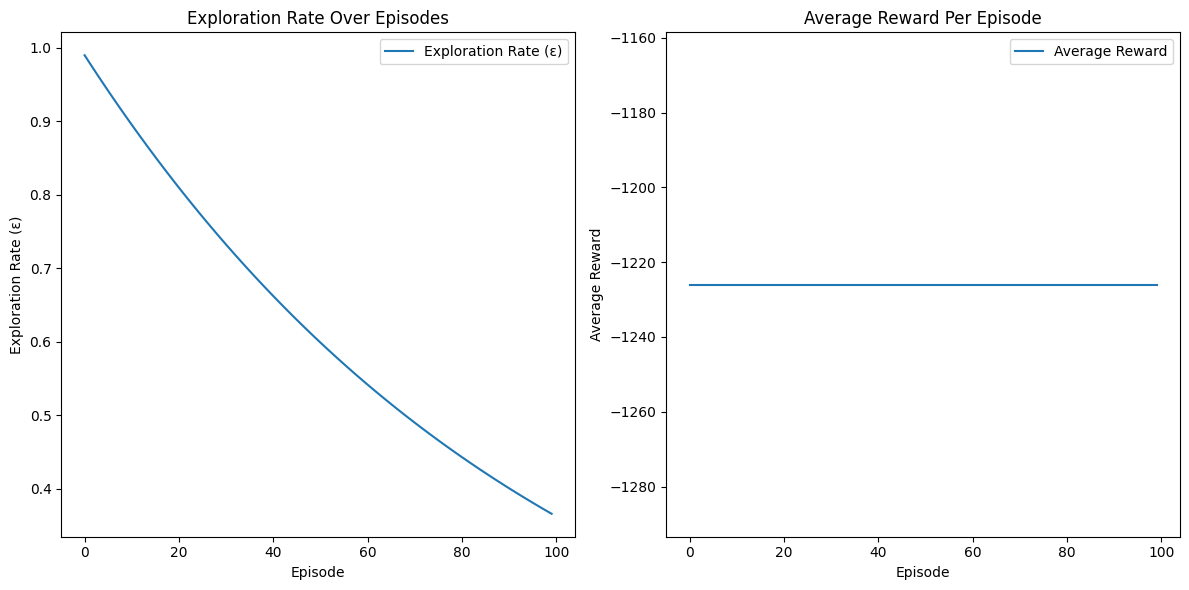

In [8]:
import matplotlib.pyplot as plt

# Initialize lists to store exploration rate and average reward per episode
epsilon_values = []
average_rewards = []

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon_initial = 1.0  # Initial exploration rate
epsilon_min = 0.1  # Minimum exploration rate
epsilon_decay = 0.99  # Decay rate for epsilon

# Function to choose an action using epsilon-greedy policy
def choose_action(state_index, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(actions)  # Explore
    else:
        return np.argmax(q_table[state_index])  # Exploit

# Function to update the Q-value
def update_q_value(state_index, action_index, reward, next_state_index):
    best_next_action = np.argmax(q_table[next_state_index])
    q_table[state_index, action_index] += alpha * (reward + gamma * q_table[next_state_index, best_next_action] - q_table[state_index, action_index])

# Simulate the Q-learning process
for episode in range(100):  # Number of episodes for training
    episode_rewards = []
    for state_index in range(states.shape[0]):
        action = choose_action(state_index, epsilon_initial)
        reward = -(covid_data['New cases'].iloc[state_index] + covid_data['Deaths / 100 Cases'].iloc[state_index])
        next_state_index = (state_index + 1) % states.shape[0]
        update_q_value(state_index, action, reward, next_state_index)
        episode_rewards.append(reward)
    
    # Track exploration rate and average reward
    epsilon_initial = max(epsilon_min, epsilon_initial * epsilon_decay)
    epsilon_values.append(epsilon_initial)
    average_rewards.append(np.mean(episode_rewards))

# Plot exploration rate and average reward
plt.figure(figsize=(12, 6))

# Plot exploration rate
plt.subplot(1, 2, 1)
plt.plot(epsilon_values, label='Exploration Rate (ε)')
plt.xlabel('Episode')
plt.ylabel('Exploration Rate (ε)')
plt.title('Exploration Rate Over Episodes')
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
plt.plot(average_rewards, label='Average Reward')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward Per Episode')
plt.legend()

plt.tight_layout()
plt.show()
